In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

#data process
data_file = "./Course_Project.xlsx"

train_data = pd.read_excel(data_file, sheet_name="training", header=1, engine='openpyxl')
test_data = pd.read_excel(data_file, sheet_name="test", header=1, engine='openpyxl')

#split train data
train_data, eval_data = train_test_split(train_data, test_size=0.2, random_state=1234)
print ("train data is: {}, eval data is: {}".format(train_data.shape[0], eval_data.shape[0]))
train_data

train data is: 1002, eval data is: 251


A  B  C  D  E  F  G  H  I  Class
523   1  0  1 -1  1 -1  1  1  0     -1
438   1 -1  0 -1 -1 -1  0  1  0      1
981   1  0 -1 -1 -1  0  0 -1  0     -1
446  -1  0  1  0  0  0  0  1  0     -1
412   1  1  0  1  1 -1 -1  1  0     -1
...  .. .. .. .. .. .. .. .. ..    ...
664   1  0  1  1  0  0  0  1  0     -1
1228  0  0 -1  0  1  0 -1 -1  0      1
1077 -1 -1  1 -1 -1  1 -1 -1  0      1
723  -1 -1  0 -1 -1  1  0 -1  0      1
815   1 -1  1  1  1  1  1 -1  0      1

[1002 rows x 10 columns]

In [13]:
#build model
from  lightgbm import LGBMClassifier, Booster
from sklearn import metrics

MODEL_SAVE_PATH = "./best_model.bin"
params = {
    'n_estimators': 500,
    'task': "train",
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': 3,
    'num_leaves': 8,
    'max_depth': 8,
    'learning_rate': 0.1,
    'verbose': 0,
    'lambda_l1': 0.5,
    'lambda_l2': 10,
    'min_data_in_leaf': 3,
}

#get feature from train data
feat_names = train_data.columns.to_list()[:-1]

In [16]:
#training
model = LGBMClassifier(**params)
model.fit(train_data[feat_names],
          train_data["Class"],
          eval_set=(eval_data[feat_names], eval_data["Class"]),
          eval_metric="logloss",
          early_stopping_rounds=50,
          verbose=2)
print ("the best iter is {}".format(model.best_iteration_))
model.booster_.save_model(MODEL_SAVE_PATH, num_iteration=model.best_iteration_)

[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[266]	valid_0's multi_logloss: 0.292191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[268]	valid_0's multi_logloss: 0.292192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[270]	valid_0's multi_logloss: 0.292214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[272]	valid_0's multi_logloss: 0.292164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[316]	valid_0's multi_logloss: 0.291738
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[318]	valid_0's multi_logloss: 0.291732
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[320]	valid_0's mult

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[364]	valid_0's multi_logloss: 0.292391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[366]	valid_0's multi_logloss: 0.292397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

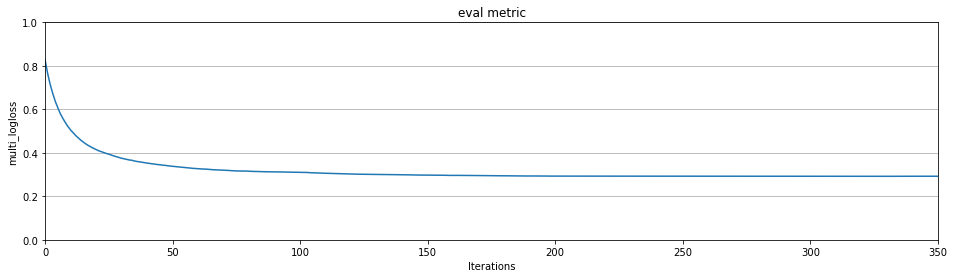

In [27]:
import matplotlib
import matplotlib.pyplot as plt

#plot eval matric
eval_res = model.evals_result_["valid_0"]["multi_logloss"]

plt.figure(figsize=((16,4)))
plt.plot([i for i in range(len(eval_res))], eval_res)
# plt.xticks(x, x)
plt.xlim((0, 350))
plt.ylim((0, 1))
plt.xlabel("Iterations")
plt.ylabel("multi_logloss")
plt.title("eval metric")
plt.grid(axis="y")

<Figure size 1152x288 with 0 Axes>

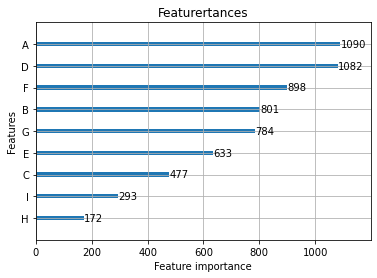

In [34]:
import lightgbm

#plot features importance
plt.figure(figsize=((16,4)))
lightgbm.plot_importance(model, max_num_features=30)
plt.title("Featurertances")
plt.show()

In [43]:
# print best evaluation acc
from sklearn import metrics
eval_pred = model.predict(eval_data[feat_names])
matric = metrics.classification_report(eval_data["Class"].values, eval_pred)
print (matric)

              precision    recall  f1-score   support

          -1       0.90      0.93      0.92       122
           0       0.69      0.50      0.58        18
           1       0.88      0.89      0.89       111

    accuracy                           0.88       251
   macro avg       0.83      0.78      0.80       251
weighted avg       0.88      0.88      0.88       251



In [31]:
from openpyxl import load_workbook

#prediction and save result
pred = model.predict(test_data[feat_names])
test_data["Class"] = pred

writer = pd.ExcelWriter("./Course_Project.xlsx",engine='openpyxl')
book = load_workbook("./Course_Project.xlsx")
writer.book = book
test_data.to_excel(writer, sheet_name="test_predction", header=1, index = False)
writer.save()
writer.close()